# Preliminaries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
data = pd.read_excel('C:\\Users\\Closer\\Desktop\\Closer\\Imp_Doc\\A2Z_Insurance.xlsx', delimiter=',' )


#Int_data = ["First Policy´s Year", "Customer Age", "Gross Monthly Salary", "Geographic Living Area"]
#data[Int_data] = data[Int_data].applymap(np.int64)

In [94]:
data['Educational Degree'] = data['Educational Degree'].fillna(method='ffill').map(lambda x: int(x[0]))



In [98]:
data.head()

,Customer Identity,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,1,1985.0,34.0,2,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,21.0,2,1353.0,4.0,1.0,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,46.0,1,4554.0,3.0,0.0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,35.0,3,2197.0,4.0,1.0,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,43.0,3,3526.0,4.0,1.0,35.23,0.904281,338.62,47.80,182.59,18.78,41.45


In [99]:
df1 = data[['Customer Identity', 'First Policy´s Year', 'Customer Age', 'Educational Degree',
       'Gross Monthly Salary', 'Geographic Living Area',
       'Has Children (Y=1)', 'Customer Monetary Value', 'Claims Rate',
       'Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations']]

# Creating new dataset

## 1. Change the Name_of_the_Column and integrate it with underscore so that the names can be used directly for the further purposes. 


#  Df (Stylish)

In [101]:
df_rename =df1.rename(columns = {'Customer Identity':'Customer_Identity' , 
                           'First Policy´s Year':'First_Policy_Year',
                           'Customer Age':'Customer_Age', 'Educational Degree':'Educational_Degree',
                           'Gross Monthly Salary': 'Gross_Monthly_Salary',
                           'Geographic Living Area':'Geographic_Living_Area',
                           'Has Children (Y=1)': 'Has_Children', 
                           'Customer Monetary Value':'Customer_Monetary_Value',
                           'Claims Rate':'Claims_Rate',
                           'Premiums in LOB: Motor':'Premiums_Motor', 
                           'Premiums in LOB: Household':'Premiums_Household',
                           'Premiums in LOB: Health':'Premiums_Health',
                           'Premiums in LOB:  Life':'Premiums_Life',
                           'Premiums in LOB: Work Compensations':'Premiums_Work_Compensations'})

In [102]:

df_rename.columns

Index(['Customer_Identity', 'First_Policy_Year', 'Customer_Age',
       'Educational_Degree', 'Gross_Monthly_Salary', 'Geographic_Living_Area',
       'Has_Children', 'Customer_Monetary_Value', 'Claims_Rate',
       'Premiums_Motor', 'Premiums_Household', 'Premiums_Health',
       'Premiums_Life', 'Premiums_Work_Compensations'],
      dtype='object')

##  Now, need to organise the dataset. 

### NaN treatment

In [103]:
df_rename.shape

(10296, 14)

In [104]:
df_Id_Index = df_rename.set_index('Customer_Identity')

In [105]:
df2= df_Id_Index.fillna(method= 'ffill') #Interpolate the values

In [10]:
#df_CR_index = df_fillna.sort_values('Claims_Rate')

In [108]:
df2.shape

(10296, 13)

In [109]:
df2.isnull().any()

First_Policy_Year              False
Customer_Age                   False
Educational_Degree             False
Gross_Monthly_Salary           False
Geographic_Living_Area         False
Has_Children                   False
Customer_Monetary_Value        False
Claims_Rate                    False
Premiums_Motor                 False
Premiums_Household             False
Premiums_Health                False
Premiums_Life                  False
Premiums_Work_Compensations    False
dtype: bool

###  NaN - interpolation

In [110]:
df2.columns

Index(['First_Policy_Year', 'Customer_Age', 'Educational_Degree',
       'Gross_Monthly_Salary', 'Geographic_Living_Area', 'Has_Children',
       'Customer_Monetary_Value', 'Claims_Rate', 'Premiums_Motor',
       'Premiums_Household', 'Premiums_Health', 'Premiums_Life',
       'Premiums_Work_Compensations'],
      dtype='object')

In [111]:
df2.head()

,First_Policy_Year,Customer_Age,Educational_Degree,Gross_Monthly_Salary,Geographic_Living_Area,Has_Children,Customer_Monetary_Value,Claims_Rate,Premiums_Motor,Premiums_Household,Premiums_Health,Premiums_Life,Premiums_Work_Compensations
Customer_Identity,,,,,,,,,,,,,
1,1985.0,34.0,2,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89
2,1981.0,21.0,2,1353.0,4.0,1.0,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13
3,1991.0,46.0,1,4554.0,3.0,0.0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02
4,1990.0,35.0,3,2197.0,4.0,1.0,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34
5,1986.0,43.0,3,3526.0,4.0,1.0,35.23,0.904281,338.62,47.80,182.59,18.78,41.45


In [16]:
df2.iloc[:,[3]];

In [117]:
columns =  df2.iloc[:,:6]
for col in columns:
    df2[col] = df2[col].apply(int)
df2;

In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 1 to 10296
Data columns (total 13 columns):
First_Policy_Year              10296 non-null int64
Customer_Age                   10296 non-null int64
Educational_Degree             10296 non-null int64
Gross_Monthly_Salary           10296 non-null int64
Geographic_Living_Area         10296 non-null int64
Has_Children                   10296 non-null int64
Customer_Monetary_Value        10296 non-null float64
Claims_Rate                    10296 non-null float64
Premiums_Motor                 10296 non-null float64
Premiums_Household             10296 non-null float64
Premiums_Health                10296 non-null float64
Premiums_Life                  10296 non-null float64
Premiums_Work_Compensations    10296 non-null float64
dtypes: float64(7), int64(6)
memory usage: 1.1 MB


## Change the Index for Data2

### - To make the DataFrame relevant, the Customer_Identity is used as index

In [121]:
df2.Claims_Rate;

In [20]:
#a = data2.First_Policy_Year.dropna().apply(np.int64); # The pupose of this was to check if it changes for the data frame or not. 
# It is found that it doesn't apply effect the data2.

### Check if there is any Null value in any column

In [119]:
df2.dtypes 

First_Policy_Year                int64
Customer_Age                     int64
Educational_Degree               int64
Gross_Monthly_Salary             int64
Geographic_Living_Area           int64
Has_Children                     int64
Customer_Monetary_Value        float64
Claims_Rate                    float64
Premiums_Motor                 float64
Premiums_Household             float64
Premiums_Health                float64
Premiums_Life                  float64
Premiums_Work_Compensations    float64
dtype: object

In [46]:
df2.describe()

,First_Policy_Year,Customer_Age,Gross_Monthly_Salary,Geographic_Living_Area,Has_Children,Customer_Monetary_Value,Claims_Rate,Premiums_Motor,Premiums_Household,Premiums_Health,Premiums_Life,Premiums_Work_Compensations,Total_Premium
count,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000,10296.000000
mean,1986.020202,47.901418,4995.856158,2.709984,0.706876,177.892604,0.684239,300.486081,210.431192,172.224793,41.884261,41.296363,766.322689
std,6.612583,17.388135,1968.171012,1.266293,0.455217,1945.811545,0.381656,211.690281,352.595984,304.094586,47.522474,51.432838,476.450835
min,1974.000000,15.000000,665.000000,1.000000,0.000000,-165680.424000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,147.020000
25%,1980.000000,33.000000,3411.000000,1.000000,0.000000,-9.440000,0.392221,190.590000,49.450000,111.800000,9.890000,10.670000,627.560000
50%,1986.000000,48.000000,4999.500000,3.000000,1.000000,186.870000,0.719198,298.610000,132.800000,162.810000,25.560000,25.670000,699.405000
75%,1992.000000,63.000000,6578.250000,4.000000,1.000000,399.777500,0.976307,408.300000,290.050000,219.040000,57.790000,56.790000,824.950000
max,1998.000000,81.000000,10042.000000,4.000000,1.000000,11875.890000,13.900000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000,29331.320000


# 2. Convert the float into int. 
## -  Remove the NaN so that you can apply (int)

##  - The most important part is to replace the NaN values (not drop) and convert the necessary floats into integers. 


### To check the customers' age in decending order. 

In [122]:
# Two column can be added with '+'
df2['Total_Premium'] =  df2.iloc[:,8]+df2.iloc[:,9] + df2.iloc[:,10] + df2.iloc[:,11]+ df2.iloc[:,12];

In [124]:
df2.Total_Premium.head()

Customer_Identity
1    665.56
2    910.96
3    740.60
4    600.68
5    629.24
Name: Total_Premium, dtype: float64

# Histograms
### - to plot the distributions of numeric variables.

# Clustering 

## Demographic Clustering 

In [ ]:
#Not used yet. 
Clus_1 = df2.First_Policy_Year.values
Clus_2 = df2.Customer_Age.values
Clus_3 = df2.Gross_Monthly_Salary.values

In [125]:
  
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 1 to 10296
Data columns (total 14 columns):
First_Policy_Year              10296 non-null int64
Customer_Age                   10296 non-null int64
Educational_Degree             10296 non-null int64
Gross_Monthly_Salary           10296 non-null int64
Geographic_Living_Area         10296 non-null int64
Has_Children                   10296 non-null int64
Customer_Monetary_Value        10296 non-null float64
Claims_Rate                    10296 non-null float64
Premiums_Motor                 10296 non-null float64
Premiums_Household             10296 non-null float64
Premiums_Health                10296 non-null float64
Premiums_Life                  10296 non-null float64
Premiums_Work_Compensations    10296 non-null float64
Total_Premium                  10296 non-null float64
dtypes: float64(8), int64(6)
memory usage: 1.5 MB


## Trail 1

In [126]:
df2.columns

Index(['First_Policy_Year', 'Customer_Age', 'Educational_Degree',
       'Gross_Monthly_Salary', 'Geographic_Living_Area', 'Has_Children',
       'Customer_Monetary_Value', 'Claims_Rate', 'Premiums_Motor',
       'Premiums_Household', 'Premiums_Health', 'Premiums_Life',
       'Premiums_Work_Compensations', 'Total_Premium'],
      dtype='object')

In [134]:
from sklearn.preprocessing import StandardScaler

Demo_Data = df2[['Total_Premium','Claims_Rate','Customer_Monetary_Value','Has_Children','Customer_Age','Educational_Degree','Gross_Monthly_Salary'] ]

In [135]:
Demo_Data.head()

,Total_Premium,Claims_Rate,Customer_Monetary_Value,Has_Children,Customer_Age,Educational_Degree,Gross_Monthly_Salary
Customer_Identity,,,,,,,
1,665.56,0.390032,380.97,1,34,2,4354
2,910.96,1.116503,-131.13,1,21,2,1353
3,740.60,0.284810,504.67,0,46,1,4554
4,600.68,0.986665,-16.99,1,35,3,2197
5,629.24,0.904281,35.23,1,43,3,3526


In [136]:
# Separating out the Demographic Data.

x = Demo_Data.values

# Separating out the Target as regions. 
y = df2.loc[:,['Geographic_Living_Area']].values

# Standardizing the features
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [137]:
x

array([[-0.21149629, -0.77090611,  0.10437149, ..., -0.79951604,
        -0.60237827, -0.32613392],
       [ 0.30358712,  1.13265922, -0.15882196, ..., -1.54718859,
        -0.60237827, -1.85097385],
       [-0.05399075, -1.04662055,  0.16794703, ..., -0.10935677,
        -1.85964294, -0.2245118 ],
       ...,
       [-0.14710037, -1.23914495,  0.17793306, ..., -0.45443641,
         0.6548864 ,  0.42637789],
       [ 0.01804536, -0.10265942,  0.03708525, ..., -0.51194968,
        -1.85964294, -0.5359836 ],
       [-0.20310047, -1.08531333,  0.14691622, ..., -0.74200277,
         1.91215107,  0.32221521]])

In [138]:
df2.head()

,First_Policy_Year,Customer_Age,Educational_Degree,Gross_Monthly_Salary,Geographic_Living_Area,Has_Children,Customer_Monetary_Value,Claims_Rate,Premiums_Motor,Premiums_Household,Premiums_Health,Premiums_Life,Premiums_Work_Compensations,Total_Premium
Customer_Identity,,,,,,,,,,,,,,
1,1985,34,2,4354,1,1,380.97,0.390032,375.85,79.45,146.36,47.01,16.89,665.56
2,1981,21,2,1353,4,1,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13,910.96
3,1991,46,1,4554,3,0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02,740.60
4,1990,35,3,2197,4,1,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34,600.68
5,1986,43,3,3526,4,1,35.23,0.904281,338.62,47.80,182.59,18.78,41.45,629.24


## PCA (Principle Component Analysis) Projection to 2D
The original data has 4 columns ('Customer_Age','First_Policy_Year','Total_Premium', and 'Customer_Monetary_Value'). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. We should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [139]:
from sklearn.decomposition import PCA

In [203]:
pca = PCA(n_components=5)
pca.fit_transform(x)
# principalDf = pd.DataFrame(data = Demography_Data
#              , columns = ['Demography_Data_1', 'Demography_Data_2'])

array([[ 1.06967264e+00,  1.84062260e-02, -5.80504488e-01,
         3.64527211e-01, -6.24662182e-01],
       [ 2.52248365e+00,  1.82987260e-01,  1.00515863e+00,
        -6.14405877e-01,  9.53223521e-02],
       [-1.33662809e-01,  1.65354967e+00, -3.75779691e-01,
         5.54809873e-01, -1.71520927e+00],
       ...,
       [ 1.66404389e-01, -6.34949531e-01, -1.19665005e+00,
         6.71173215e-01,  2.07370341e-01],
       [ 1.27670568e+00,  9.07074267e-01,  1.84263038e-01,
        -8.95827337e-04, -1.23121871e+00],
       [ 1.69721006e-01, -1.45976643e+00, -1.29418807e+00,
         5.95822378e-01,  1.08693238e+00]])

In [206]:
pca.explained_variance_ratio_

array([0.3332295 , 0.16768635, 0.16270414, 0.12225667, 0.11780344])

In [195]:
x

array([[-0.21149629, -0.77090611,  0.10437149, ..., -0.79951604,
        -0.60237827, -0.32613392],
       [ 0.30358712,  1.13265922, -0.15882196, ..., -1.54718859,
        -0.60237827, -1.85097385],
       [-0.05399075, -1.04662055,  0.16794703, ..., -0.10935677,
        -1.85964294, -0.2245118 ],
       ...,
       [-0.14710037, -1.23914495,  0.17793306, ..., -0.45443641,
         0.6548864 ,  0.42637789],
       [ 0.01804536, -0.10265942,  0.03708525, ..., -0.51194968,
        -1.85964294, -0.5359836 ],
       [-0.20310047, -1.08531333,  0.14691622, ..., -0.74200277,
         1.91215107,  0.32221521]])

In [143]:
principalDf.index=df2[['Customer_Age']].index

In [144]:
finalDf = pd.concat([principalDf, df2[['Customer_Age']]], axis = 1)

In [145]:
finalDf.head()

,Demography_Data_1,Demography_Data_2,Customer_Age
Customer_Identity,,,
1,1.069673,0.018406,34
2,2.522484,0.182987,21
3,-0.133663,1.653550,46
4,1.459278,-0.959605,35
5,0.764789,-0.869367,43


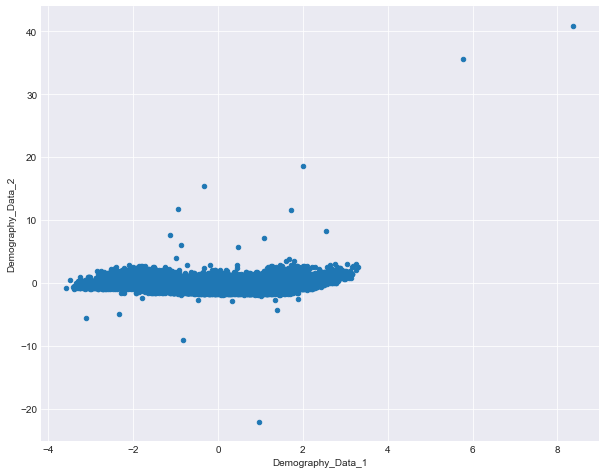

In [179]:
%matplotlib inline
colors = ['r', 'g', 'b', 'y', 'c', 'm']
ax = finalDf.plot(kind='scatter', x='Demography_Data_1', y='Demography_Data_2', figsize=(10,8))
#for i,idn in enumerate(finalDf.index):
   # ax.annotate(idn, (finalDf.iloc[i].Demography_Data_1, finalDf.iloc[i].Demography_Data_2))

## Visualize 2D Projection
This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other

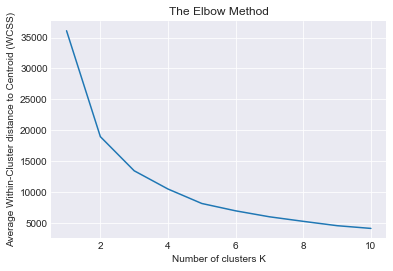

In [180]:
# K-Means Clustering

X=principalDf.values

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')  
plt.show()




In [181]:
# Applying k-means to the mall dataset
kmeans=KMeans(n_clusters=6, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(X)

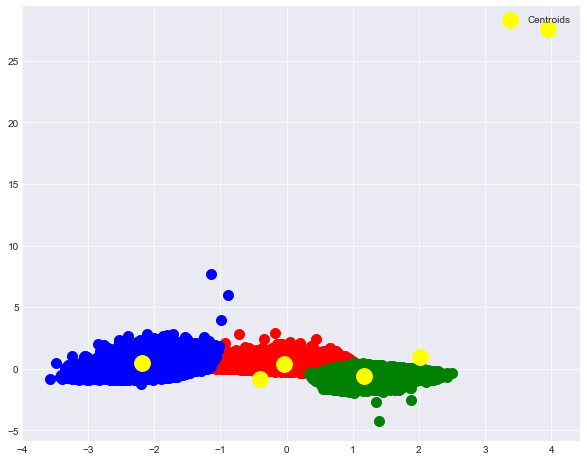

In [182]:
# Visualizing the clusters
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', 
            label='Centroids')

plt.legend()
plt.show()

In [161]:
Demo_Data.columns

Index(['Total_Premium', 'Claims_Rate', 'Customer_Monetary_Value',
       'Has_Children', 'Customer_Age', 'Educational_Degree',
       'Gross_Monthly_Salary'],
      dtype='object')

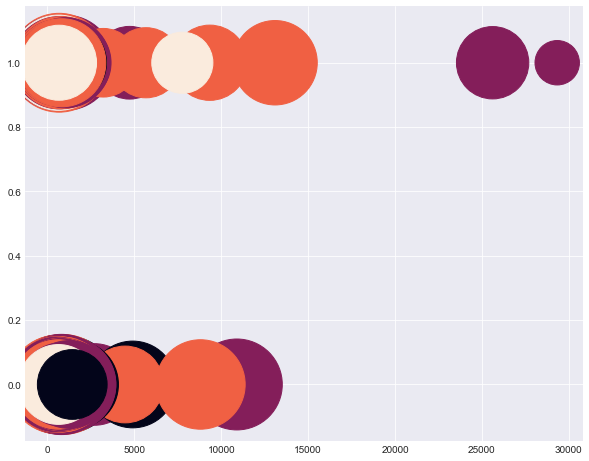

In [173]:
# Getting the values and plotting it
fig, ax = plt.subplots(figsize = (10,8))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
f1 = Demo_Data['Total_Premium'].values
f2 = Demo_Data['Has_Children'].values
f3 = Demo_Data['Gross_Monthly_Salary'].values

f4 = Demo_Data['Educational_Degree'].values

X = np.array(list(zip(f1, f2,f3,f4)))
plt.scatter(f1, f2,f3,f4)

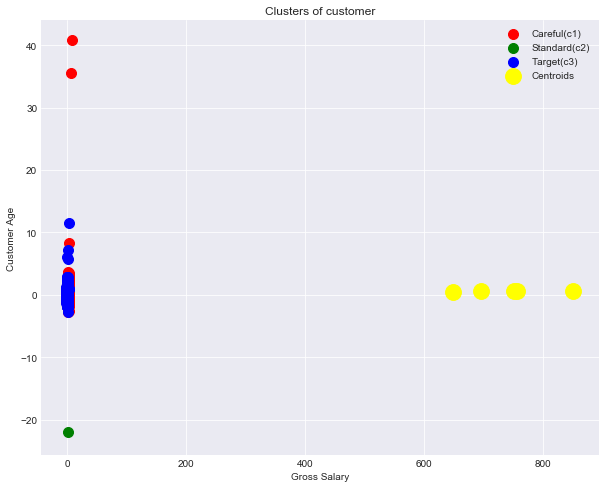

In [174]:
# Create canvas
fig, ax = plt.subplots(figsize=(10,8))

# Visualizing the clusters
ax.scatter(principalDf.values[y_kmeans == 0, 0], principalDf.values[y_kmeans == 0, 1], s = 100, c = 'red', label='Careful(c1)')
ax.scatter(principalDf.values[y_kmeans == 2, 0], principalDf.values[y_kmeans == 2, 1], s = 100, c = 'green', label='Standard(c2)')
ax.scatter(principalDf.values[y_kmeans == 1, 0], principalDf.values[y_kmeans == 1, 1], s = 100, c = 'blue', label='Target(c3)')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', 
            label='Centroids')

ax.set(title='Clusters of customer',
       xlabel='Gross Salary',
       ylabel='Customer Age',)
ax.legend()
plt.show()

## See the correlations between variables 
This significant to make the decision for the selection of appropriate columns for clustering. 

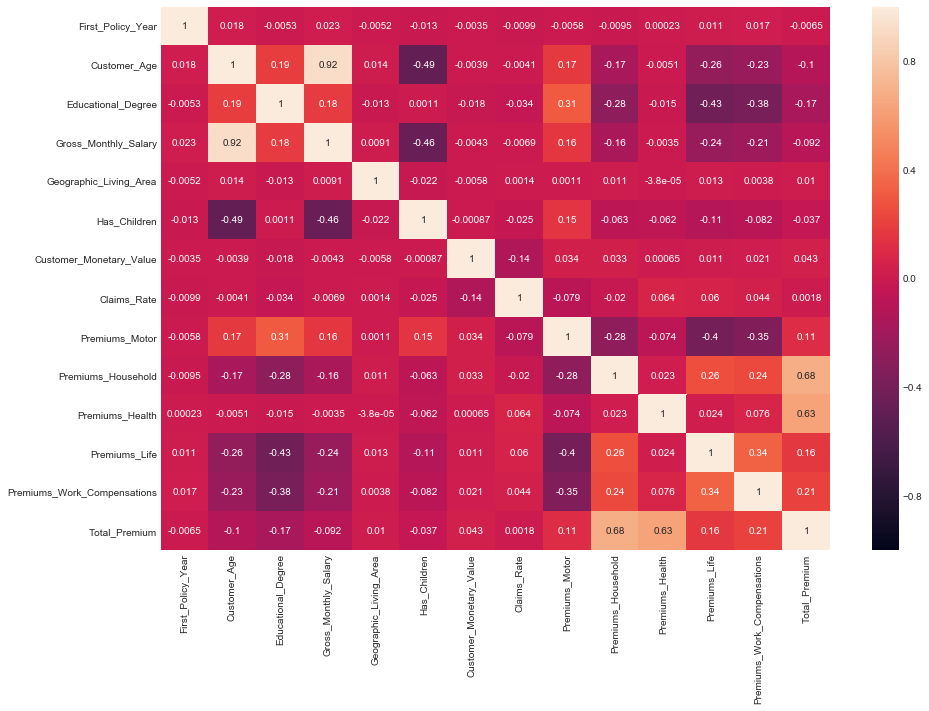

In [177]:
fig, ax = plt.subplots(figsize=(15,10))
# calculate the correlation matrix
corr = df2.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True, vmin=-1,vmax=1)


In [38]:
df2.corr(method='pearson', min_periods=1)

,First_Policy_Year,Customer_Age,Gross_Monthly_Salary,Geographic_Living_Area,Has_Children,Customer_Monetary_Value,Claims_Rate,Premiums_Motor,Premiums_Household,Premiums_Health,Premiums_Life,Premiums_Work_Compensations,Total_Premium
First_Policy_Year,1.000000,0.018418,0.022929,-0.005240,-0.012586,-0.003512,-0.009910,-0.005845,-0.009454,0.000225,0.010828,0.017400,-0.006491
Customer_Age,0.018418,1.000000,0.923388,0.014045,-0.489988,-0.003903,-0.004136,0.174216,-0.169839,-0.005063,-0.258535,-0.232537,-0.102404
Gross_Monthly_Salary,0.022929,0.923388,1.000000,0.009072,-0.460878,-0.004304,-0.006921,0.163379,-0.156406,-0.003455,-0.239253,-0.213862,-0.092312
Geographic_Living_Area,-0.005240,0.014045,0.009072,1.000000,-0.021951,-0.005800,0.001416,0.001112,0.010968,-0.000038,0.012936,0.003829,0.010290
Has_Children,-0.012586,-0.489988,-0.460878,-0.021951,1.000000,-0.000866,-0.025147,0.154916,-0.062665,-0.061623,-0.112430,-0.081887,-0.036930
Customer_Monetary_Value,-0.003512,-0.003903,-0.004304,-0.005800,-0.000866,1.000000,-0.136795,0.033618,0.032664,0.000649,0.010704,0.020636,0.042819
Claims_Rate,-0.009910,-0.004136,-0.006921,0.001416,-0.025147,-0.136795,1.000000,-0.078790,-0.020049,0.064067,0.060296,0.044181,0.001830
Premiums_Motor,-0.005845,0.174216,0.163379,0.001112,0.154916,0.033618,-0.078790,1.000000,-0.276467,-0.074054,-0.404709,-0.348496,0.114456
Premiums_Household,-0.009454,-0.169839,-0.156406,0.010968,-0.062665,0.032664,-0.020049,-0.276467,1.000000,0.022566,0.260407,0.240479,0.683546
Premiums_Health,0.000225,-0.005063,-0.003455,-0.000038,-0.061623,0.000649,0.064067,-0.074054,0.022566,1.000000,0.023913,0.076310,0.632670


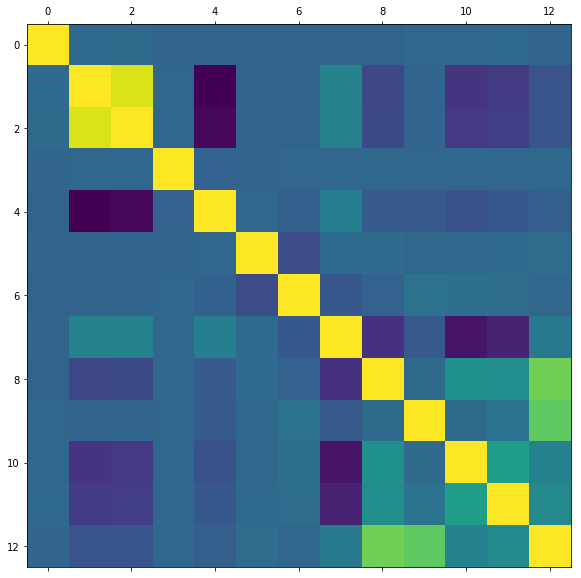

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
ax.matshow(df2.corr())

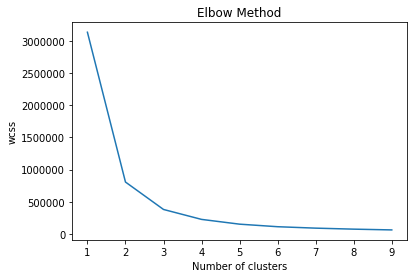

In [69]:
wcss =[]
for i in range(1,10):
    kmeans  = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(finalDf)
    wcss.append(kmeans.inertia_)
     
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

### Find the optimal number of clusters

In [41]:
# Applying k-means to the mall dataset
kmeans=KMeans(n_clusters=4, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(finalDf)

In [43]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df2.iloc[rndperm[:n_sne],feat_cols].values)

print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

SyntaxError: invalid syntax (<ipython-input-43-276f5062c7b0>, line 11)

## Trial 2

In [ ]:
Data_Clus = df2[['Customer_Age', 'Gross_Monthly_Salary',
       'Geographic_Living_Area', 'Has_Children', 'Total_Premium', 'Claims_Rate']]


In [ ]:
Data_Clus.head()

In [ ]:
df2.head()

In [ ]:

# Applying k-means to the mall dataset
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(Data_Clus)

In [ ]:
# Create canvas
fig, ax = plt.subplots(figsize=(10,8))

# Visualizing the clusters
ax.scatter(Data_Clus.values[y_kmeans == 0, 0], Data_Clus.values[y_kmeans == 0, 1], s = 100, c = 'red', label='Careful(c1)')
ax.scatter(Data_Clus.values[y_kmeans == 2, 0], Data_Clus.values[y_kmeans == 2, 1], s = 100, c = 'green', label='Standard(c2)')
ax.scatter(Data_Clus.values[y_kmeans == 1, 0], Data_Clus.values[y_kmeans == 1, 1], s = 100, c = 'blue', label='Target(c3)')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', 
            label='Centroids')

ax.set(title='Clusters of customer',
       xlabel='Gross Salary',
       ylabel='Customer Age',)
ax.legend()
plt.show()

## Trial 3

In [ ]:
Data_Clus3 = df2[[ 'Gross_Monthly_Salary',
       'Geographic_Living_Area', 'Has_Children', 'Total_Premium', 'Claims_Rate']]

In [ ]:
class KMeans:
    def __init__(self,k):
        self.k = k 
        selk.means = None
        
    def classify(self, input):
        return min(range(self,k),
                   key = lambda i: sqrd_distance(input, self.means[i]))
    def train(self, inputs):
        self.means = random.sample(inputs, self.k)
        assignments = None
        while true:
            new_assignments = map(self.classify, inputs)
            if assignments == new_assignments:return
            

In [184]:
df2.columns

Index(['First_Policy_Year', 'Customer_Age', 'Educational_Degree',
       'Gross_Monthly_Salary', 'Geographic_Living_Area', 'Has_Children',
       'Customer_Monetary_Value', 'Claims_Rate', 'Premiums_Motor',
       'Premiums_Household', 'Premiums_Health', 'Premiums_Life',
       'Premiums_Work_Compensations', 'Total_Premium'],
      dtype='object')

#  Catagorization

## Monthly Salary in based on Living Area

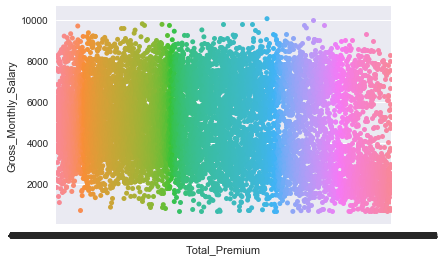

In [185]:
import seaborn as sbn
#df4=df2.head(5000)
sbn.set_style("darkgrid")
ax = sbn.swarmplot(x= df2.Total_Premium, y = df2.Gross_Monthly_Salary , data= df2)
plt.xticks(rotation=0)
plt.rcParams["xtick.labelsize"] = 10

In [ ]:
import seaborn as sbn
#df4=df3.head(500)
sbn.set_style("darkgrid")
ax = sbn.swarmplot(x= df2.Geographic_Living_Area, y = df2.Premiums_Life , data= df2)
plt.xticks(rotation=0)
plt.rcParams["xtick.labelsize"] = 10

In [ ]:
import seaborn as sbn
#df4=df3.head(500)
sbn.set_style("darkgrid")
ax = sbn.swarmplot(x= df2.Geographic_Living_Area, y = df2.Customer_Age, data= df2)
plt.xticks(rotation=0)
plt.rcParams["xtick.labelsize"] = 10

### Observation: 
#### The number of people living in region 2 is the least and highest number of people belong to region 4.
#### A close observation finds the age group patterns, < 30 , 30-55 and > 55. However, it can be divided further. 

In [ ]:
import seaborn as sbn
df4=df3.head(500)
sbn.set_style("darkgrid")
ax = sbn.swarmplot(x= df4.Geographic_Living_Area, y = df4.Claims_Rate, data= df4)
plt.xticks(rotation=0)
plt.rcParams["xtick.labelsize"] = 5

In [ ]:
import seaborn as sbn
df4=df3.head(500)
sbn.set_style("darkgrid")
ax = sbn.swarmplot( x = df4.Has_Children, y= df4.Customer_Age,data= df4)
plt.xticks(rotation=0)
plt.rcParams["xtick.labelsize"] = 10

## This result is quite important. This shows that our customer are of two types, one who has children and others who don't have children. The customers withoutout children largely do not intend to have this particular insurance until the age of 60 (Retirement). On the contrary, the customers with children has subscribed for this particular insurance before a very starting point of their carrier and largely they are interested until the age of 60. The subscriptions are counteracting to each other. 

In [ ]:
sns.boxplot(x = df3.Has_Children, y=df3.Claims_Rate, data=df3)

## Customers' Gross Monthly Salary analysis based on Has_Children and Geographic_Living_Area 

In [ ]:
sns.boxplot(x=df3.Geographic_Living_Area, y = df3.Gross_Monthly_Salary, hue= df3.Has_Children, palette = 'husl')

In [ ]:
sns.violinplot(x=df3.Geographic_Living_Area, y = df3.Gross_Monthly_Salary, hue= df3.Has_Children)

In [ ]:
sns.violinplot(x=df3.Geographic_Living_Area, y = df3.Claims_Rate, hue= df3.Has_Children)

In [ ]:
df3.columns

## Boxplot for one variable 

In [ ]:
sns.boxplot(x=df3.Customer_Age, color='#EB89B')
plt.xticks(rotation=0)
plt.rcParams["xtick.labelsize"] = 10

In [ ]:
sns.boxplot(x=df3.Claims_Rate)
plt.xticks(rotation=0)
plt.rcParams["xtick.labelsize"] = 20


In [ ]:
list(df.columns)

df = pd.DataFrame({'a' : [1, 2, 3], 'b' : [1.1, 2.1, 3.1], 'c' : [1.1, 2.1, 3.1]})


columns = list(df.columns)[1:]

for c in columns:
    df[c] = df[c].apply(int)
                           
print(df)                           

In [ ]:
import seaborn as sbn
sbn.set_style("whitegrid")
ax = sbn.swarmplot(x= "Customer Age", y = "Gross Monthly Salary" , data= data1)

In [ ]:
import seaborn as sbn
sbn.set_style("darkgrid")
#tips = sbn.data("tips")
ax = sbn.barplot(x= "Customer Age", y = "Gross Monthly Salary" , data= data1)

In [ ]:
import seaborn as sbn
sbn.set_style("darkgrid")
#tips = sbn.data("tips")
ax = sbn.violinplot(x= "Customer Age", y = "Gross Monthly Salary" , data= data1)

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
ax = sns.violinplot(x= "Geographic Living Area", y = "Gross Monthly Salary" , data= data1)

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
ax = sns.violinplot(x= "Has Children (Y=1)", y = "Gross Monthly Salary" , data= data1)

In [ ]:
import seaborn as sns
sbn.set_style("darkgrid")
#tips = sbn.data("tips")
ax = sns.violinplot(x= "Has Children (Y=1)", y = "Gross Monthly Salary" , data= data1)

In [183]:
sns.set(style="whitegrid", palette="muted")




# "Melt" the dataset to "long-form" or "tidy" representation
#iris = pd.melt(data1, "Customer Age", var_name="Gross Monthly Salary")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(y="Gross Monthly Salary", x="Customer Age", hue="Geographic Living Area", data= data1)
#To visualize the x axis labels we use:
plt.xticks(rotation=90)
plt.rcParams["xtick.labelsize"] = 10

NameError: name 'data1' is not defined

In [ ]:
sns.boxplot(data=data['Gross Monthly Salary'])

In [ ]:
import seaborn as sbn
sbn.set_style("whitegrid")
#tips = sbn.data("tips")
ax = sbn.swarmplot(x= "Customer Age", y = "Gross Monthly Salary" , data= data)

In [ ]:
data.columns


In [ ]:
import pandas as pd
import numpy as np
#from matplotlib.colors import Normalize, rgb2hex
import matplotlib.pyplot as plt

data = pd.read_excel('C:\\Users\\Closer\\Desktop\\Closer\\Imp_Doc\\A2Z_Insurance.xlsx', delimiter=',')
data1 = data.head(n = 10)


In [ ]:
data1.index


In [ ]:
plt.matshow(data1.corr())

In [ ]:
data1.columns

In [ ]:
sns.boxplot(y = data1['Customer Age'], x = data1['Has Children (Y=1)'])

In [ ]:
import seaborn as sns
corr = data1.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data1.hist(bins=50, figsize=(15,10), color='#AB89B5')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
from sklearn import svm 
clf = svm.SVM()
clf.fit(X,y)

## Claim_Rate based on Geographyc_Living_Area

In [ ]:
df2.info()

## Data Filtering 

In [ ]:
#Region based
df2_GLA_1= df2[df2.Geographic_Living_Area == 1]
df2_GLA_2= df2[df2.Geographic_Living_Area == 2]
df2_GLA_3= df2[df2.Geographic_Living_Area == 3]
df2_GLA_4= df2[df2.Geographic_Living_Area == 4]

In [ ]:
#based in children
df2_No_Child = df2[df2.Has_Children == 0]
df2_Yes_Child = [df2.Has_Children == 1]

In [ ]:
df2[df2.Customer_Monetary_Value > 0].info()

In [ ]:
df3.columns


In [ ]:
sns.barplot(x= df3.Geographic_Living_Area, y = df3.Claims_Rate)

In [ ]:
#The violin plot features a kernel density estimation of the underlying distribution.
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x=df.Geographic_Living_Area, y=df.Gross_Monthly_Salary, hue=df.Has_Children, data=df, split=True,
               inner="quart")
sns.despine(left=True)

In [ ]:
sns.pairplot(df2, hue = 'Geographic_Living_Area',size = 4)


In [ ]:
#The violin plot features a kernel density estimation of the underlying distribution.
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x=df.Geographic_Living_Area, y=df.Claims_Rate, hue=df.Has_Children, data=df, split=True,
               inner="quart")
sns.despine(left=True)

In [ ]:
data2.columns

In [ ]:
data2[(data2.Customer_Age >= 60) | (data2.Customer_Monetary_Value >= 50) ];

# It gives common results 

#  Filter the Data

In [ ]:
df.shape

In [ ]:
#Check Unique value for each column
def unique_counts(df2):
    for i in df2.columns:
        count = df2[i].nunique()
        print(i, ": ", count)
unique_counts(df2)

First_Policy_Year,  Customer_Age, Geographic_Living_Area and Has_Children is preferable to use as the unique value classification- 

In [ ]:
sns.pairplot(df2, hue='First_Policy_Year', kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True);

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(df2)

In [ ]:
df.columns

In [ ]:
#sns.boxplot(df2.Customer_Monetary_Value)
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum()

#mask = (df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))
#df2[mask] = np.nan

In [ ]:
df2['Claims_Rate'];

In [ ]:
sns.jointplot(y = df2['Claims_Rate'] , x = 'Customer_Age', data= df2)

In [ ]:
df2.columns

In [ ]:
df2.head()

In [ ]:
df3 = df2[(df2['Customer_Monetary_Value'] > -100).values & (df2['Customer_Monetary_Value'] < 2300).values]

In [ ]:
sns.jointplot(y = 'Customer_Monetary_Value', x = 'Customer_Age', data= df3)


In [ ]:
from

In [ ]:
class KMeans:
    def __init__(self, k):
        self.k = k # number of clusters
        self.means = None # means of clusters
    
    def classify(self, input):
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))
    def train(self, inputs):
        self.means = random.sample(inputs, self.k)
        assignments = None
        while True:
            new_assignments = map(self.classify, inputs)

            if assignments == new_assignments:return
            assignments = new_assignments
            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                if i_points:
                    self.means[i] = vector_mean(i_points)

In [ ]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]
for k in clusters:
    model=KMeans(n_clusters)
    model.fit(Data_Seg_1)
    clusassign=model.predict(Data_Seg_1)
    meandist.append(sum(np.min(cdist(df2, model.cluster_centers_),  axis=1)),
                df2.shape[0])

In [ ]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [ ]:
Data_Seg_1 = df2[['Customer_Age',
       'First_Policy_Year', 'Geographic_Living_Area']]

In [ ]:
#from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=5000, centers=5,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:,1],   data =Data_Seg_1);

In [ ]:
random.df2(0) # so you get the same results as me
clusterer = KMeans(3)
clusterer.train(inputs)
colors = 10*["g","r","c","b"]
print (clusterer.means)

In [ ]:

kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(Data_Seg_1)



In [ ]:
predictions = kmeans.predict(Data_Seg_1)

In [ ]:
set(list(predictions))

In [ ]:
len(predictions)

In [ ]:
predictions[:10]

In [ ]:
dir(kmeans)

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

cluster_centers = kmeans.cluster_centers_

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(4), colors):
    my_members = predictions == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
#from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=5000, centers=5,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:,1],   data =Data_Seg_1);